# VotingRegressor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('A.csv')
data.head()

,date,open,high,low,close,volume
0,2022-05-17 09:42:00+05:30,872.0,872.0,872.0,872.0,3759243
1,2022-05-17 09:45:00+05:30,872.0,872.0,872.0,872.0,0
2,2022-05-17 09:48:00+05:30,872.0,872.0,872.0,872.0,0
3,2022-05-17 09:51:00+05:30,872.0,872.0,872.0,872.0,0
4,2022-05-17 09:54:00+05:30,872.0,872.0,872.0,872.0,0


In [3]:
del data['date']

In [4]:
df=data.dropna()
df

,open,high,low,close,volume
0,872.00,872.00,872.00,872.00,3759243
1,872.00,872.00,872.00,872.00,0
2,872.00,872.00,872.00,872.00,0
3,872.00,872.00,872.00,872.00,0
4,872.00,872.00,872.00,872.00,0
...,...,...,...,...,...
12611,619.00,619.25,618.55,618.60,9248
12612,618.60,619.00,618.55,618.95,24869
12613,618.95,619.50,618.80,619.50,19918
12614,619.50,620.20,619.25,620.00,19867


In [5]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [6]:
x = df.drop(labels='close', axis=1)
y = df.loc[:,'close']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
print("Number of training dataset : ", len(x_train))
print("Number of test dataset     : ", len(x_test))
print("Total number of dataset    : ", len(x_train)+len(x_test))

Number of training dataset :  10092
Number of test dataset     :  2524
Total number of dataset    :  12616


In [8]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import VotingRegressor

In [9]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [10]:
r1=AdaBoostRegressor()
r2=LinearRegression()
r3=RandomForestRegressor()

In [11]:
VC = VotingRegressor([('ra', r1), ('rl', r2), ('rr', r3)])
VC.fit(x_train,y_train)
predicted = VC.predict(x_test)

In [12]:
MSE = mean_squared_error(y_test,predicted)
print('mean_squared_error of VotingClassifier Result is:\n',MSE)
print("\n")

mean_squared_error of VotingClassifier Result is:
 1.649866365093443




In [13]:
R2 = r2_score(y_test,predicted)
print('r2_score of VotingClassifier is:',R2*100)
print("\n")

r2_score of VotingClassifier is: 99.95743875259593




In [14]:
MAE = mean_absolute_error(y_test,predicted)
print('mean_absolute_error result of VotingClassifier is:',MAE)
print("\n")

mean_absolute_error result of VotingClassifier is: 0.9587719470391773




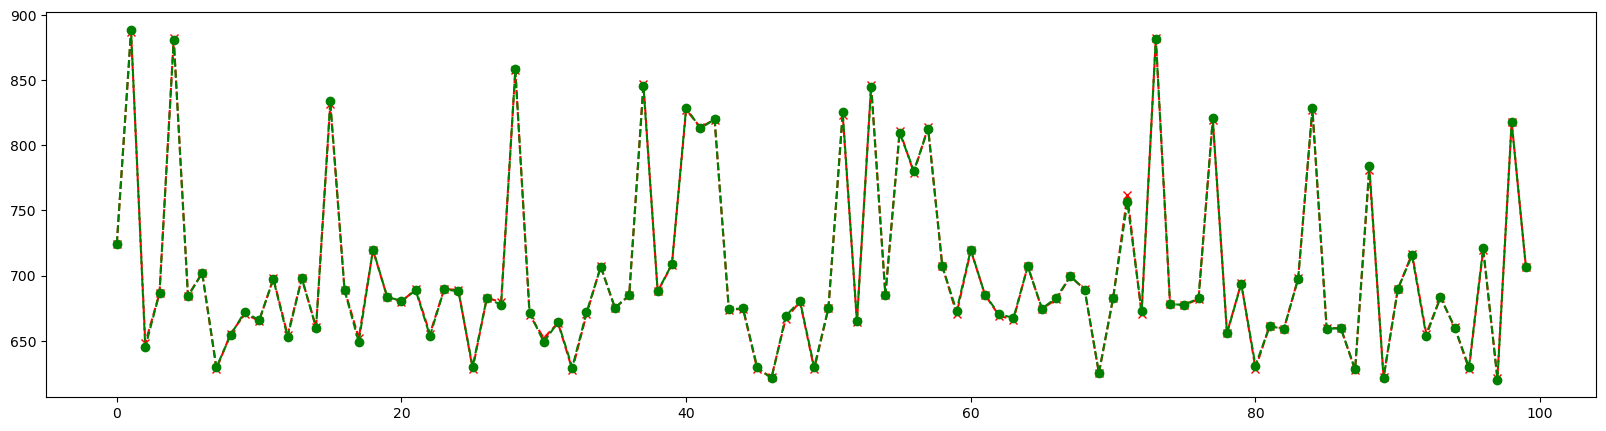

In [15]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [16]:
import joblib
joblib.dump(VC,'MODEL.pkl')

['MODEL.pkl']